# *** Payment Fraud Detection using Machine Learning ***

## Importing necessary libraries

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing the Fraud.csv Dataset

In [264]:
df = pd.read_csv(r"C:\Users\MANOJ\Downloads\Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Data Preprocessing

In [4]:
df.shape

(6362620, 11)

In [5]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [6]:
df['isFraud'].value_counts(normalize = True)*100

isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64

In [7]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [15]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [19]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [21]:
df['nameOrig'].value_counts()

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64

In [22]:
df['nameDest'].value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [27]:
df['nameOrig'] = df['nameOrig'].str.replace(r'[A-Za-z]', '', regex=True)
df['nameDest'] = df['nameDest'].str.replace(r'[A-Za-z]', '', regex=True)

In [29]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,1231006815,170136.0,160296.36,1979787155,0.0,0.0,0,0
1,1,3,1864.28,1666544295,21249.0,19384.72,2044282225,0.0,0.0,0,0
2,1,4,181.00,1305486145,181.0,0.00,553264065,0.0,0.0,1,0
3,1,1,181.00,840083671,181.0,0.00,38997010,21182.0,0.0,1,0
4,1,3,11668.14,2048537720,41554.0,29885.86,1230701703,0.0,0.0,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(1), int64(3), object(2)
memory usage: 509.7+ MB


In [33]:
df['type'] = df['type'].astype('int64')
df['nameOrig'] = df['nameOrig'].astype('int64')
df['nameDest'] = df['nameDest'].astype('int64')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB


## Feature Engineering

<Axes: >

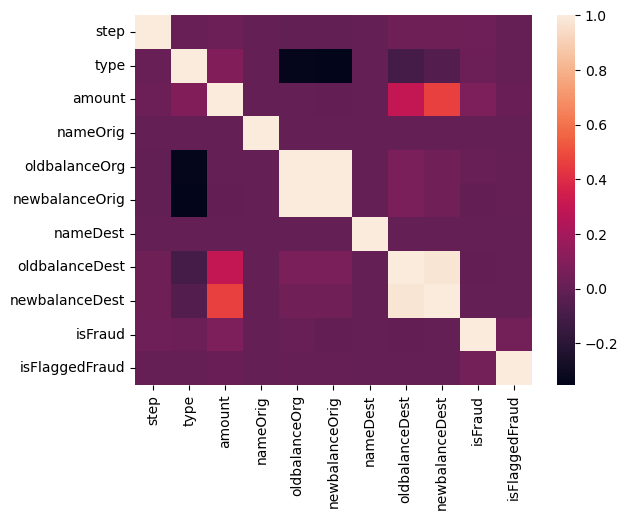

In [37]:
sns.heatmap(df.corr(),cbar = True)

<Axes: >

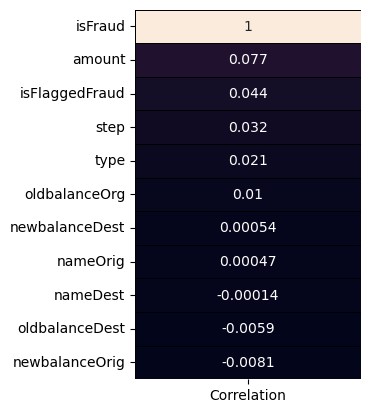

In [39]:
corr = df.corrwith(df['isFraud']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
plt.subplot(1,2,1)
sns.heatmap(corr.iloc[:,:],annot = True,linewidths = 0.4,linecolor = 'black',cbar = False)

## Here no features having the correlation are in the range [-0.1,0.1] with respective to target variable. So, there is no need to remove any features.

<Axes: >

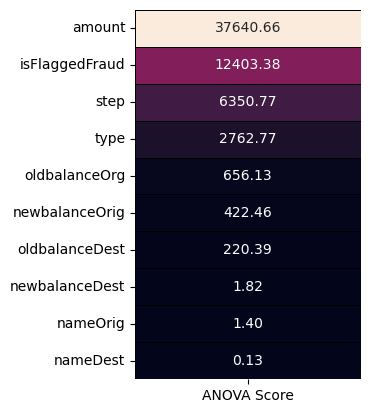

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

features = df.drop('isFraud', axis = 1)
target = df['isFraud']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)


featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])
featureScores = featureScores.sort_values(ascending = False,by = 'ANOVA Score')

plt.subplot(1,2,1)
sns.heatmap(featureScores.iloc[:15,:],annot = True,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')

## Here some features are having ANOVA score less than 50. So, we are removing the features which are having the ANOVA score less than '50' to make the dataset more understandable to the ML models.

In [279]:
df_ANOVA = df[['amount','isFlaggedFraud','step','type','oldbalanceOrg','newbalanceOrig','oldbalanceDest','isFraud']].copy(deep = True)
df_ANOVA.head()

,amount,isFlaggedFraud,step,type,oldbalanceOrg,newbalanceOrig,oldbalanceDest,isFraud
0,9839.64,0,1,PAYMENT,170136.0,160296.36,0.0,0
1,1864.28,0,1,PAYMENT,21249.0,19384.72,0.0,0
2,181.00,0,1,TRANSFER,181.0,0.00,0.0,1
3,181.00,0,1,CASH_OUT,181.0,0.00,21182.0,1
4,11668.14,0,1,PAYMENT,41554.0,29885.86,0.0,0


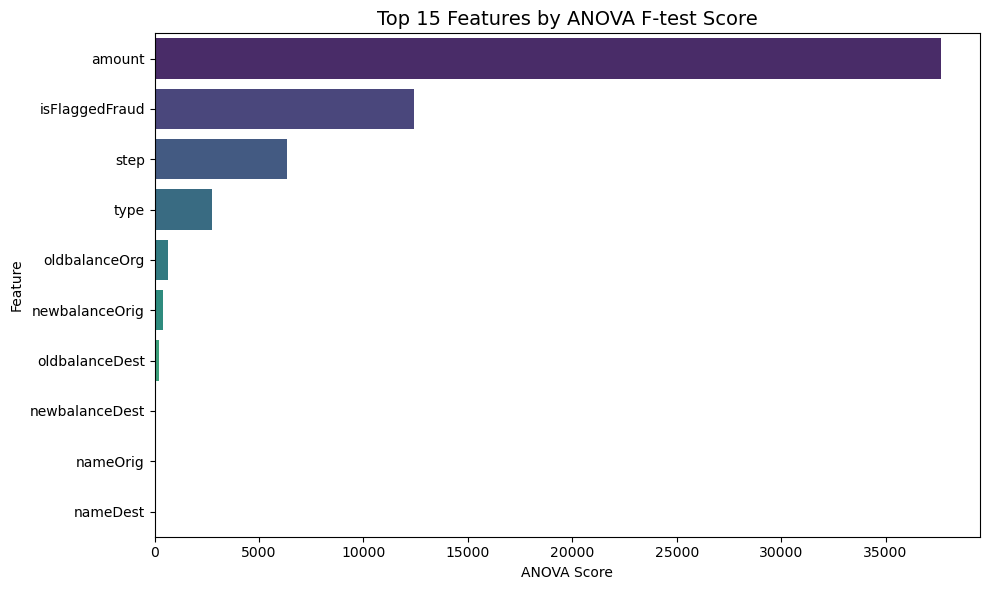

In [274]:
featureScores = pd.DataFrame({
    'Feature': features.columns,
    'ANOVA Score': fit.scores_
}).sort_values(by='ANOVA Score', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(
    x='ANOVA Score',
    y='Feature',
    data=featureScores.head(15),  # Top 15 features
    palette='viridis'
)
plt.title('Top 15 Features by ANOVA F-test Score', fontsize=14)
plt.xlabel('ANOVA Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Key Factors that Predict a Fraudulent Customer (Based on ANOVA Scores in the Plot)
### From the bar plot, the top features influencing fraud prediction are:
### 1. amount – Transaction amount.
### 2. isFlaggedFraud – Whether the transaction was flagged by the system as suspicious.
### 3. step – Likely a time step variable (e.g., hours or days since start of dataset).
### 4. type – Type of transaction (e.g., transfer, cash out, payment).
### 5. oldbalanceOrg – Original account balance of the sender before transaction.
### Other features like newbalanceOrig, oldbalanceDest, newbalanceDest have much smaller ANOVA scores, indicating less impact.

# Do These Factors Make Sense?
### Yes, they do.
### amount: Large or unusual transaction amounts are a common fraud indicator. Fraudsters often move significant sums in one go to avoid multiple smaller detection triggers.
### isFlaggedFraud: This is a strong signal because it represents the model or rule-based system’s pre-flagging — naturally, flagged transactions correlate with fraud.
### step (time): Fraudulent transactions may cluster at certain times or occur rapidly in succession after account takeover.
### type: Certain transaction types (like “TRANSFER” or “CASH_OUT”) are more prone to fraud than others (like “PAYMENT”).
### oldbalanceOrg: Abnormal differences between original balance and transaction behavior can indicate suspicious activity.

## Handling the Class Imbalance problem by combination of Under Sampling and Over Sampling(SMOTE)

In [46]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.pipeline import Pipeline

## For the Dataset acheived based on Correlation scores

In [48]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = df.iloc[:,:10].values
t1 = df.iloc[:,9].values

steps = [('under', under),('over', over) ]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0: 82130, 1: 41065})

## For the Dataset acheived based on ANOVA scores

In [50]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
f2 = df_ANOVA.iloc[:,:7].values
t2 = df_ANOVA.iloc[:,7].values

steps = [('under', under),('over', over) ]
pipeline = Pipeline(steps=steps)
f2, t2 = pipeline.fit_resample(f2, t2)
Counter(t2)

Counter({0: 82130, 1: 41065})

## Training the ML model

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

## Here I am training the ML models based on two datasets one acheived based on Correlation scores and another one with ANOVA scores.

In [54]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(f1, t1, test_size = 0.20, random_state = 2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(f2, t2, test_size = 0.20, random_state = 2)

In [117]:
x_calib, x_val, y_calib, y_val = train_test_split(x_test2, y_test2, test_size=0.2)

In [81]:
  def model(classifier,x_train,y_train,x_test,y_test):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))
    #Accuracy
    print("Accuracy: ",'{0:.2%}'.format(accuracy_score(y_test,classifier.predict(x_test))))

## Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression( penalty='l2',
    C=0.1,
    solver='liblinear',
    class_weight='balanced',
    random_state=42)

Cross Validation Score :  98.20%
ROC_AUC Score :  93.91%


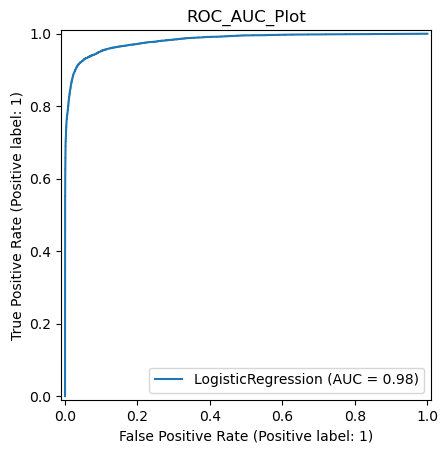

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     16471
           1       0.92      0.92      0.92      8168

    accuracy                           0.95     24639
   macro avg       0.94      0.94      0.94     24639
weighted avg       0.95      0.95      0.95     24639

Accuracy:  94.70%


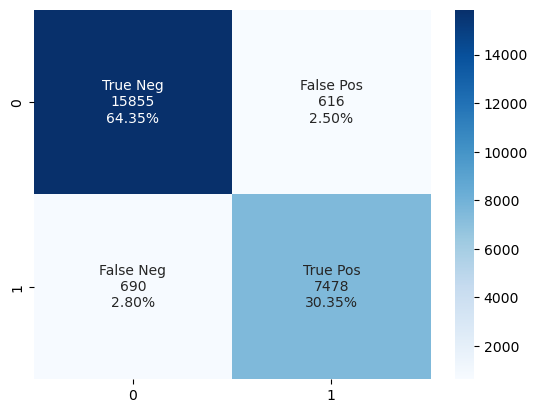

In [85]:
model(classifier_lr,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_lr,x_test1,y_test1)

Cross Validation Score :  96.55%
ROC_AUC Score :  91.80%


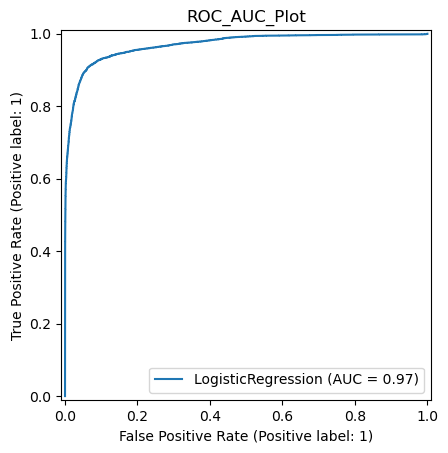

              precision    recall  f1-score   support

           0       0.96      0.91      0.94     16471
           1       0.84      0.92      0.88      8168

    accuracy                           0.92     24639
   macro avg       0.90      0.92      0.91     24639
weighted avg       0.92      0.92      0.92     24639

Accuracy:  91.60%


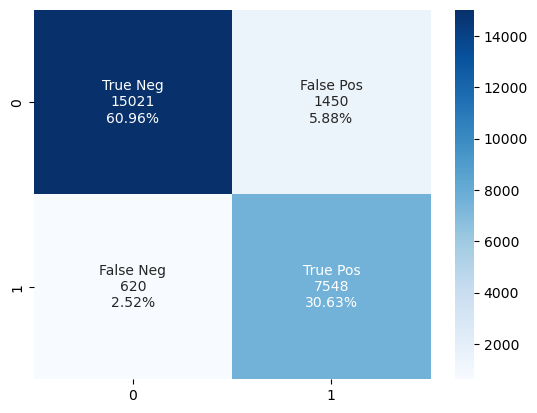

In [88]:
model(classifier_lr,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_lr,x_test2,y_test2)

## XGBClassifier

Cross Validation Score :  100.00%
ROC_AUC Score :  100.00%


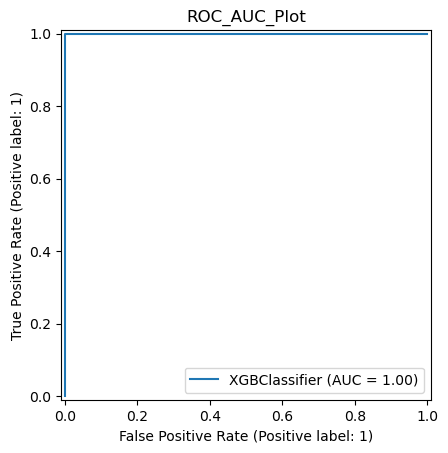

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16471
           1       1.00      1.00      1.00      8168

    accuracy                           1.00     24639
   macro avg       1.00      1.00      1.00     24639
weighted avg       1.00      1.00      1.00     24639

Accuracy:  100.00%


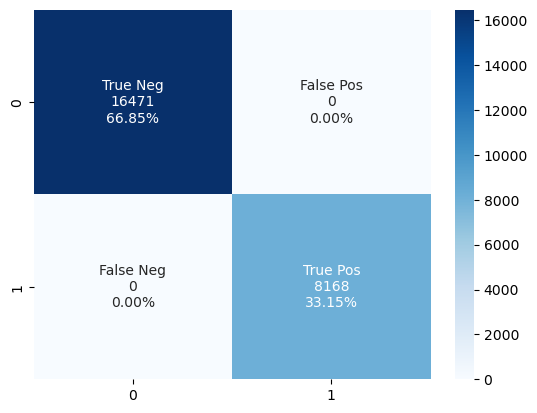

In [89]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

model(xgb,x_train1,y_train1,x_test1,y_test1)
model_evaluation(xgb,x_test1,y_test1)

Cross Validation Score :  99.98%
ROC_AUC Score :  99.74%


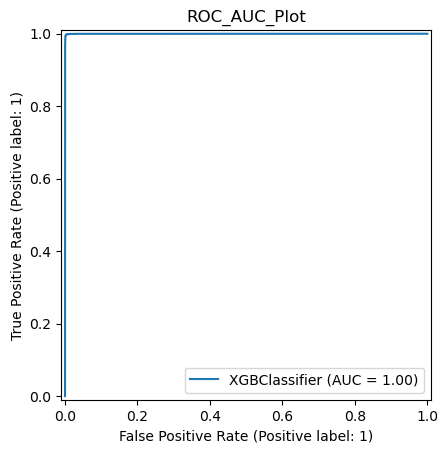

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16471
           1       0.99      1.00      1.00      8168

    accuracy                           1.00     24639
   macro avg       1.00      1.00      1.00     24639
weighted avg       1.00      1.00      1.00     24639

Accuracy:  99.73%


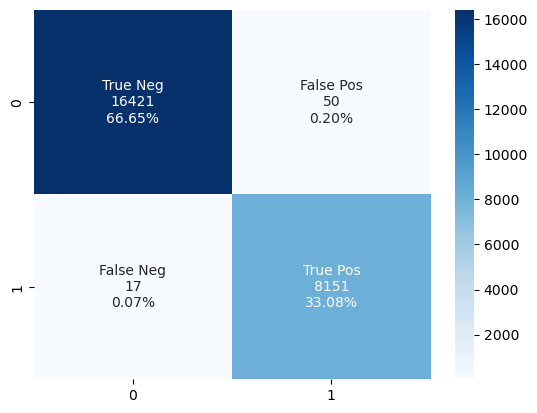

In [90]:
model(xgb,x_train2,y_train2,x_test2,y_test2)
model_evaluation(xgb,x_test2,y_test2)

## RandomForestClassifier

Cross Validation Score :  100.00%
ROC_AUC Score :  100.00%


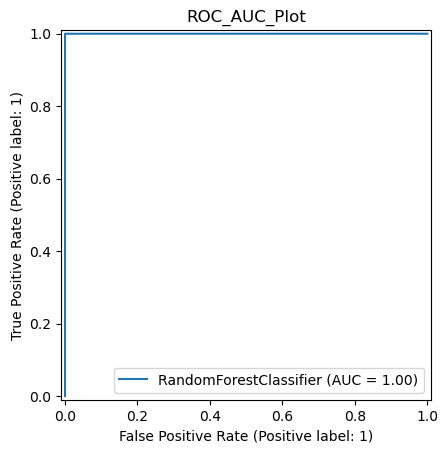

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16471
           1       1.00      1.00      1.00      8168

    accuracy                           1.00     24639
   macro avg       1.00      1.00      1.00     24639
weighted avg       1.00      1.00      1.00     24639

Accuracy:
 1.0


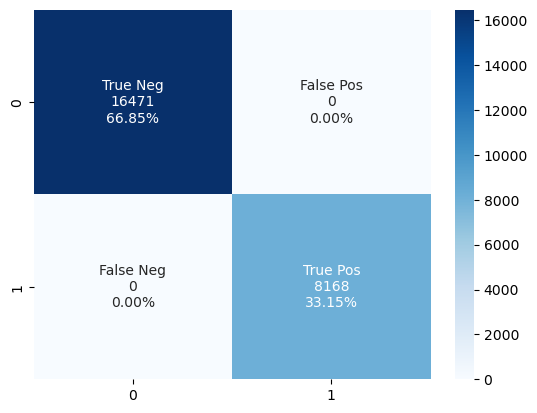

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(
    n_estimators=100,
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42,
    class_weight='balanced'
)
model(rf,x_train1,y_train1,x_test1,y_test1)
model_evaluation(rf,x_test1,y_test1)

Cross Validation Score :  99.88%
ROC_AUC Score :  98.68%


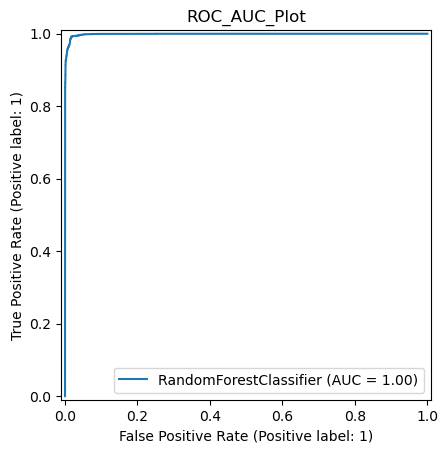

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     16471
           1       0.96      0.99      0.98      8168

    accuracy                           0.99     24639
   macro avg       0.98      0.99      0.98     24639
weighted avg       0.99      0.99      0.99     24639

Accuracy:  98.51%


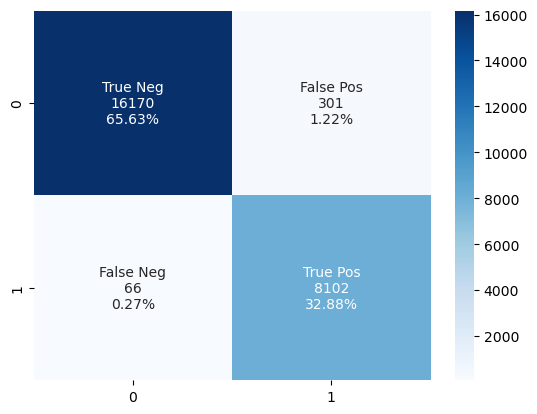

In [86]:
model(rf,x_train2,y_train2,x_test2,y_test2)
model_evaluation(rf,x_test2,y_test2)

In [207]:
from sklearn.calibration import CalibratedClassifierCV

calibrated = CalibratedClassifierCV(rf, method='isotonic', cv='prefit')
calibrated.fit(x_calib, y_calib)
y_pred = calibrated.predict(x_val)

Classification report:
                precision    recall  f1-score   support

           0       0.99      0.99      0.99      3313
           1       0.97      0.99      0.98      1615

    accuracy                           0.99      4928
   macro avg       0.98      0.99      0.98      4928
weighted avg       0.99      0.99      0.99      4928

Accuracy:  98.56%


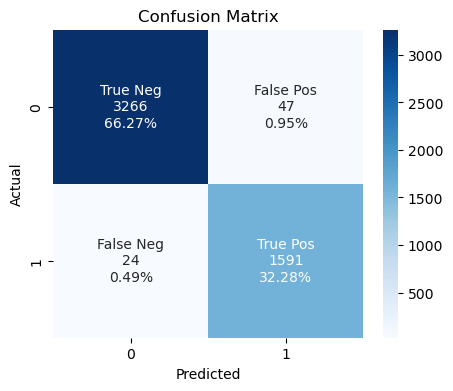

In [219]:

print("Classification report:\n ",classification_report(y_val,y_pred))

print("Accuracy: ",'{0:.2%}'.format(accuracy_score(y_val,y_pred)))

cm = confusion_matrix(y_val, y_pred)

names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

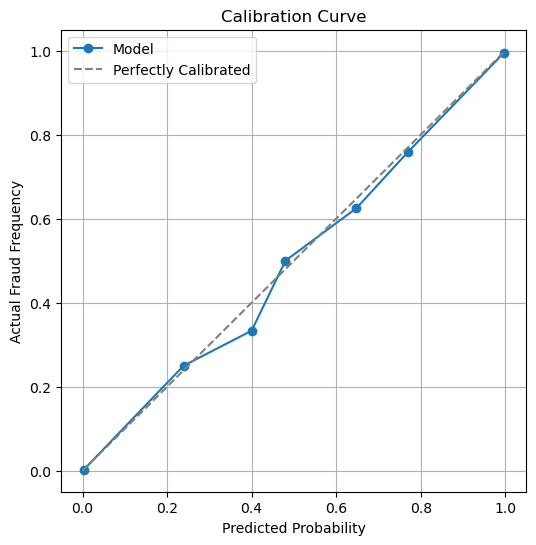

In [213]:
from sklearn.calibration import calibration_curve

y_prob = calibrated.predict_proba(x_val)[:, 1] 
prob_true, prob_pred = calibration_curve(y_val, y_prob, n_bins=7)

# Plot calibration curve
plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker='o', label="Model")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Perfectly Calibrated")
plt.xlabel("Predicted Probability")
plt.ylabel("Actual Fraud Frequency")
plt.title("Calibration Curve")
plt.legend()
plt.grid(True)
plt.show()

## KNeighborsClassifier

In [111]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

Cross Validation Score :  80.74%
ROC_AUC Score :  73.79%


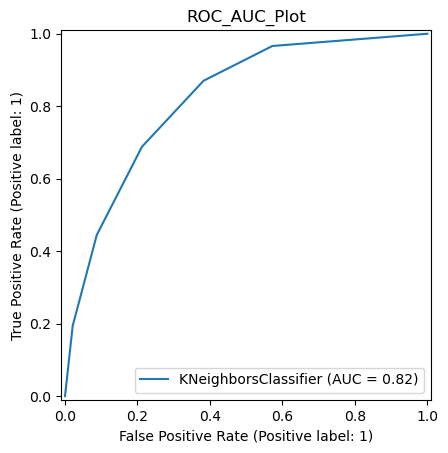

              precision    recall  f1-score   support

           0       0.84      0.79      0.81     16471
           1       0.62      0.69      0.65      8168

    accuracy                           0.75     24639
   macro avg       0.73      0.74      0.73     24639
weighted avg       0.76      0.75      0.76     24639

Accuracy:  75.47%


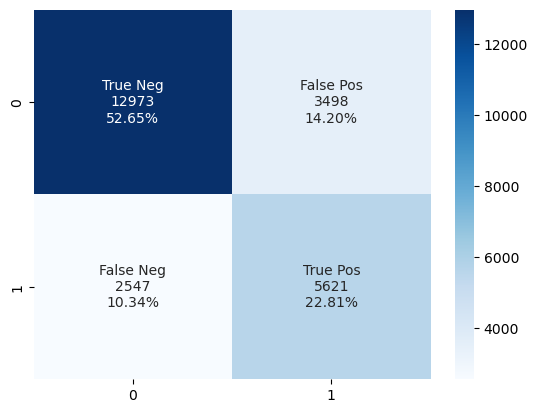

In [113]:
model(knn,x_train1,y_train1,x_test1,y_test1)
model_evaluation(knn,x_test1,y_test1)

Cross Validation Score :  99.48%
ROC_AUC Score :  98.36%


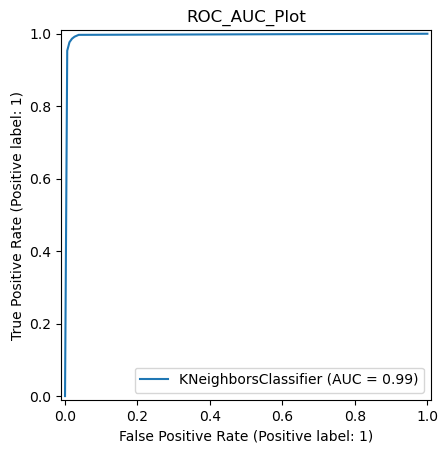

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     16471
           1       0.96      0.99      0.97      8168

    accuracy                           0.98     24639
   macro avg       0.98      0.98      0.98     24639
weighted avg       0.98      0.98      0.98     24639

Accuracy:  98.26%


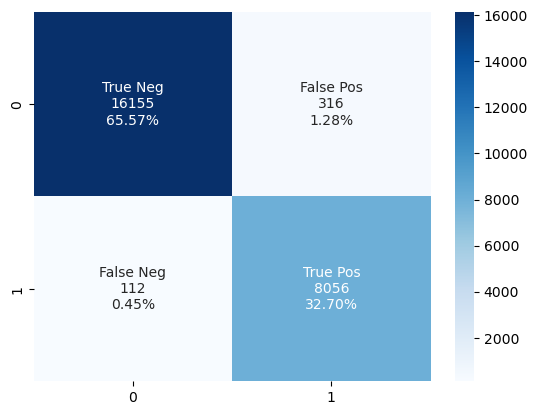

In [244]:
model(knn,x_train2,y_train2,x_test2,y_test2)
model_evaluation(knn,x_test2,y_test2)

# What kind of prevention should be adopted while company update its infrastructure?
### In fraud-related projects like the one in your plot, the biggest risk during infrastructure updates is that attackers exploit temporary misconfigurations or downtime.
### Prevention means securing data channels, keeping fraud detection models running during migration, and closely monitoring transactions in real-time.

# Assuming these actions have been implemented, how would you determine if they work?
### To check if the prevention measures work, track key metrics like fraud detection rate, false positives, and response time before and after implementation.
### Run controlled tests, monitor live alerts, and audit logs to confirm security holds under real conditions.

# By using the two balanced datasets, I train different classification models 
## In those models, RandomForestClassifier which was trained on the dataset created based on ANOVA scores gave the highest performance with
## Accuracy: 98.51%
## Cross Validation Score :  99.88%
## ROC_AUC Score :  98.68%